In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import xlwt
from scipy.special import ellipk

## Qubit parameters
##### w10、Ec、Ej、α、Rn


In [149]:
# define constants
e = 1.60217657e-19  # electron charge 
h = 6.62606957e-34  # Plank's constant
hbar = 1.0545718E-34  # 
phinot = 2.067 * 1E-15  # magnetic flux quantum
phi0 = phinot / (2 * np.pi)  # reduced magnetic flux quantum
c = 3*10**8
##  Ec
Ec = 300*10**6
## 
α = -300*10**6

Qzpf =np.sqrt(hbar/100)

# 
def Ic(Rn):
    Ic = np.pi *0.182*10**-3/2/Rn
    return Ic

def Lj(Ic):
    Lj = hbar/2/e/Ic
    return Lj

## 
def Ec(Cq):
    Ec = e*e/2/Cq/h
    return Ec

# 
def Ej(Ic):
    Ej = Ic*phi0/2/np.pi/hbar
    return Ej

## 
def single_fq(Ec,Ej):
    k = Ej/Ec
    fq = np.sqrt(8*Ec)*np.sqrt(Ec*k)-Ec
    return fq

def fq_calculation(Rn,Cq): 
    Ic = np.pi *0.182*10**-3/2/Rn
    Ej = Ic*phi0/h  
    Ec = e*e/2/Cq/h 
    k = Ej/Ec
    fq = np.sqrt(8*Ec)*np.sqrt(Ec*k)-Ec
    print("If Rn =" , Rn ,', Cq = ', Cq)
    print("then, Ic =" ,Ic*10**9,"nA")
    print("then, Ej =" ,Ej/10**9, "GHz")
    print("then, Ec =" ,Ec/10**6, "MHz")
    print("then, Ej/Ec =" ,k)
    print("then, fq =" ,fq/10**9, "GHz")
    

def CPW_length_4(fr,k): #（）
    l = c/4/fr/(np.sqrt((k+1)/2))
    print("For λ/4, if fr = ",fr/10**9,"GHz","then l = ",l*10**6,"um")

def CPW_length_2(fr,k):
    l = c/2/fr/(np.sqrt((k+1)/2))
    print("For λ/2, if fr = ",fr/10**9,"GHz","then l = ",l*10**6,"um")
    

## 
def Cr_4(fr,Z0): #（fc，Z0）
    Cr = 1/8/fr/Z0
    print("For λ/4, if fr = ",fr,"then Cr = ",Cr)
    
## λ/2
def Cr_2(fr,Z0): #
    Cr = 1/4/fr/Z0
    print("For λ/2, if fr = ",fr,"then Cr = ",Cr)    


##
def g_lambda2(Cg1,fr,Cq1,fq1): #
    Cr = 1/4/fr/50   
    g = (Cg1/2)*np.sqrt(fr*fq1/Cr/Cq1)
    print("if 耦合腔频 fr = ",fr)
    print("and 耦合电容 Cg1= ",Cg1)
    print("and 量子比特1频率 fq1 =",fq1)
    print('and 耦合腔电容 Cr = ', Cr)
    print('and 量子比特1电容 Cq1 = ', Cq1)
    print("then g1(Qubit-lambda2_resonator)=", g)
    
def g_lambda4(Cg2,fr,Cq2,fq2): #
    Cr = 1/8/fr/50
    g = (Cg2/2)*np.sqrt(fr*fq2/Cr/Cq2)
    print("if fr = ",fr)
    print("and Cg2= ",Cg2)
    print("and fq2 =",fq2)
    print('and Cr = ', Cr)
    print('and Cq2 = ', Cq2)
    print("then g(Qubit-lambda4_resonator)=", g)    
    
#：Q-Q
def g_qrq(g1,g2,det1,det2): #
    g_qrq = (g1*g2)*((1/det1) + (1/det2))/2
    print("g_q-r-q = ", g_qrq)
    
# T1
def T1(w10,wr,g,Ql): #
    r=wr/Ql
    T1 = (w10-wr)**2/g**2/r
    print("if w10 = ",w10)
    print("and wr= ",wr)
    print("and g =",g)
    print('and Ql = ', Ql)
    print("then T1=", T1)
    
# 
def Dispersion_shift(g,fq,fr):
    x = g*g/(fr-fq)/(2*np.pi)
    print(x)
    
    
# 
def Ej_from_fq(fq,Ec):
    Ej = (fq+Ec)**2/8/Ec
    k = Ej/Ec
    print("if fq = ",fq/10**9,"GHz","then Ej = ",Ej/10**9,"GHz","k=",k)
    return Ej

def Ic_from_Ej(Ej):
    Ic = Ej*h/phi0
    print("if Ej=",Ej/10**9,"GHz","Ic=",Ic/10**-9,"nA")
    return Ic

def Rn_from_Ic(Ic):
    Rn = np.pi *0.182*10**-3/2/Ic
    print("if Ic=",Ic*10**9,"nA","Rn=",Rn,"Ω")
    return Rn



In [142]:
Ec(63*10**(-15))

307463959.8838242

In [143]:
Ej_from_fq(5*10**9,307463959.8838242)
Ej_from_fq(5.07*10**9,307463959.8838242)
Ej_from_fq(5.13*10**9,307463959.8838242)
Ej_from_fq(5.20*10**9,307463959.8838242)
Ej_from_fq(5.27*10**9,307463959.8838242)

if fq =  5.0 GHz then Ej =  11.452225854417804 GHz k= 37.247376436396145
if fq =  5.07 GHz then Ej =  11.75630415788236 GHz k= 38.236364881023775
if fq =  5.13 GHz then Ej =  12.020113807081263 GHz k= 39.09438300223247
if fq =  5.2 GHz then Ej =  12.331591351747484 GHz k= 40.10743684042512
if fq =  5.27 GHz then Ej =  12.647053103214601 GHz k= 41.13344896746048


12647053103.214602

In [144]:
Ic_from_Ej(11.452225854417804*10**9)
Ic_from_Ej(11.75630415788236*10**9)
Ic_from_Ej(12.020113807081263*10**9)
Ic_from_Ej(12.331591351747484*10**9)
Ic_from_Ej(12.647053103214601*10**9)

if Ej= 11.452225854417804 GHz Ic= 23.066690448485495 nA
if Ej= 11.75630415788236 GHz Ic= 23.679154801466435 nA
if Ej= 12.020113807081263 GHz Ic= 24.210511377275424 nA
if Ej= 12.331591351747484 GHz Ic= 24.83787903451547 nA
if Ej= 12.647053103214601 GHz Ic= 25.47327154789505 nA


2.547327154789505e-08

In [145]:
Rn_from_Ic(23.066690448485495*10**-9)
Rn_from_Ic(23.679154801466435*10**-9)
Rn_from_Ic(24.210511377275424*10**-9)
Rn_from_Ic(24.83787903451547*10**-9)
Rn_from_Ic(25.47327154789505*10**-9)

if Ic= 23.0666904484855 nA Rn= 12393.842632740652 Ω
if Ic= 23.679154801466435 nA Rn= 12073.274315473729 Ω
if Ic= 24.210511377275427 nA Rn= 11808.297933971346 Ω
if Ic= 24.837879034515474 nA Rn= 11510.037997986734 Ω
if Ic= 25.47327154789505 nA Rn= 11222.937381213404 Ω


11222.937381213404

## 验收频率计算 

In [146]:
fq_calculation(12000, 65e-15) #190*190

If Rn = 12000 , Cq =  6.5e-14
then, Ic = 23.823744289722598 nA
then, Ej = 11.82809041952151 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 39.6911083760377
then, fq = 5.012222605931027 GHz


### 比特频率计算

In [147]:
fq_calculation(12000, 65e-15) #190*190
print('********************************')
fq_calculation(11000, 65e-15)
print('********************************')
fq_calculation(10000, 65e-15)
print('********************************')
fq_calculation(9000, 65e-15)

If Rn = 12000 , Cq =  6.5e-14
then, Ic = 23.823744289722598 nA
then, Ej = 11.82809041952151 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 39.6911083760377
then, fq = 5.012222605931027 GHz
********************************
If Rn = 11000 , Cq =  6.5e-14
then, Ic = 25.989539225151923 nA
then, Ej = 12.903371366750738 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 43.29939095567749
then, fq = 5.248346780040851 GHz
********************************
If Rn = 10000 , Cq =  6.5e-14
then, Ic = 28.58849314766712 nA
then, Ej = 14.193708503425812 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 47.62933005124523
then, fq = 5.519057750239139 GHz
********************************
If Rn = 9000 , Cq =  6.5e-14
then, Ic = 31.764992386296797 nA
then, Ej = 15.770787226028682 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 52.92147783471694
then, fq = 5.833717448129111 GHz


### CPW长度计算

In [150]:
## 若比特间的耦合腔频为6.31GHZ，计算耦合腔的长度
CPW_length_2(6.8*10**9,10)
CPW_length_2(10*10**9,10)
CPW_length_2(15*10**9,10)

CPW_length_4(6.5*10**9,10)
CPW_length_4(6.6*10**9,10)
CPW_length_4(6.7*10**9,10)
CPW_length_4(7.0*10**9,10)
CPW_length_4(7.1*10**9,10)


For λ/2, if fr =  6.8 GHz then l =  9405.913956865166 um
For λ/2, if fr =  10.0 GHz then l =  6396.021490668312 um
For λ/2, if fr =  15.0 GHz then l =  4264.014327112209 um
For λ/4, if fr =  6.5 GHz then l =  4920.016531283318 um
For λ/4, if fr =  6.6 GHz then l =  4845.470826263873 um
For λ/4, if fr =  6.7 GHz then l =  4773.150366170383 um
For λ/4, if fr =  7.0 GHz then l =  4568.586779048795 um
For λ/4, if fr =  7.1 GHz then l =  4504.240486386136 um


### 谐振腔的的等效电容

In [108]:
# 耦合腔电容
Cr_2(7*10**9, 50)

# 读取腔电容
Cr_4(7*10**9, 50)

For λ/2, if fr =  7000000000 then Cr =  7.142857142857142e-13
For λ/4, if fr =  7000000000 then Cr =  3.571428571428571e-13


### 量子比特与谐振腔的耦合强度计算

In [189]:
# 参数： 腔频率，特性阻抗
Cr_2(6.5*10**9,50)

# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda4(10e-15,7e9,65e-15,5.5e9)

For λ/2, if fr =  6500000000.0 then Cr =  7.692307692307692e-13
if fr =  7000000000.0
and Cg2=  1e-14
and fq2 = 5500000000.0
and Cr =  3.571428571428571e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 203621065.85895887


In [190]:
Dispersion_shift(203621065,5.52e9,7e9)

4458654.553159129


In [36]:
Cr_4(6.8*10**9,50)
g_lambda4(11.5e-15,6.8e9,3.7e-13,4.6e9)

For λ/4, if fr =  6800000000.0 then Cr =  3.676470588235294e-13
if fr =  6800000000.0
and Cg2=  1.15e-14
and fq2 = 4600000000.0
and Cr =  3.676470588235294e-13
and Cq2 =  3.7e-13
then g(Qubit-lambda4_resonator)= 87193639.73829061


### 量子比特之间的耦合强度计算

In [87]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(5.7e-15, 10*10**9, 65e-15,5.0*10**9)

# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(5.7e-15, 10*10**9, 65e-15,5.07*10**9)

g_lambda2(5.7e-15, 10*10**9, 65e-15,5.13*10**9)

g_lambda2(5.7e-15, 10*10**9, 65e-15,5.20*10**9)

g_lambda2(5.7e-15, 10*10**9, 65e-15,5.27*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  5.7e-15
and 量子比特1频率 fq1 = 5000000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 111786197.0287649
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  5.7e-15
and 量子比特1频率 fq1 = 5070000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 112565980.65134956
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  5.7e-15
and 量子比特1频率 fq1 = 5130000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 113230092.49379712
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  5.7e-15
and 量子比特1频率 fq1 = 5200000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 114000000.0
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  5.7e-15
and 量子比特1频率 fq1 = 5270000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 114764742.64270431


In [89]:
# 参数：耦合强度1，耦合强度2，频差1，频差2
g_qrq(111786197,114764742.64270431,5*10**9,4.73*10**9)

g_q-r-q =  2639054.555646814


In [109]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(10.6e-15, 10*10**9, 65e-15,5.0*10**9)

# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(10.6e-15, 10*10**9, 65e-15,5.07*10**9)

g_lambda2(10.6e-15, 10*10**9, 65e-15,5.13*10**9)

g_lambda2(10.6e-15, 10*10**9, 65e-15,5.20*10**9)

g_lambda2(10.6e-15, 10*10**9, 65e-15,5.27*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  1.06e-14
and 量子比特1频率 fq1 = 5000000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 207883103.24647507
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  1.06e-14
and 量子比特1频率 fq1 = 5070000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 209333227.17619392
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  1.06e-14
and 量子比特1频率 fq1 = 5130000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 210568242.18144727
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  1.06e-14
and 量子比特1频率 fq1 = 5200000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 212000000.0
if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  1.06e-14
and 量子比特1频率 fq1 = 5270000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 213422152.98467818


In [94]:
g_qrq(207883103,209333227,5*10**9,5.93*10**9)

g_q-r-q =  8020894.938146944


### 验收色散位移g的计算

In [123]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda4(10.6e-15,6e9,65e-15,5.0e9)

if fr =  6000000000.0
and Cg2=  1.06e-14
and fq2 = 5000000000.0
and Cr =  4.1666666666666664e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 176394662.39962286


In [124]:
Dispersion_shift(176394662,5e9,6e9)

4952118.274554163


In [119]:
g_lambda4(10.6e-15,5.07e9,65e-15,6.1e9)
Dispersion_shift(164634960,5.07e9,6.1e9)

if fr =  5070000000.0
and Cg2=  1.06e-14
and fq2 = 6100000000.0
and Cr =  4.930966469428008e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 164634960.49138528
4188196.3300981126


In [115]:
g_lambda4(10.6e-15,5.13e9,65e-15,6.2e9)
Dispersion_shift(166992431,5.13e9,6.13e9)

if fr =  5130000000.0
and Cg2=  1.06e-14
and fq2 = 6130000000.0
and Cr =  4.873294346978557e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 166992431.88249812
4438269.865990554


### 论文色散位移 

In [129]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda4(10.6e-15,6.5e9,65e-15,4.708e9)
Dispersion_shift(185430329,4.708e9,6.5e9)

if fr =  6500000000.0
and Cg2=  1.06e-14
and fq2 = 4708000000.0
and Cr =  3.846153846153846e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 185430329.7737455
3053821.6102091325


In [255]:
g_lambda2(6.3e-15, 10*10**9, 65e-15,5.24*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  6.3e-15
and 量子比特1频率 fq1 = 5240000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 126483686.99924539


In [256]:
# 参数：耦合强度1，耦合强度2，频差1，频差2
g_qrq(123676656,126483686,4.99*10**9,4.76*10**9)

g_q-r-q =  3210623.4190983153


In [248]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(6.3e-15, 10*10**9, 65e-15,5.01*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  6.3e-15
and 量子比特1频率 fq1 = 5010000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 123676656.5873099


In [249]:
g_lambda2(6.3e-15, 10*10**9, 65e-15,5.24*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  6.3e-15
and 量子比特1频率 fq1 = 5240000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 126483686.99924539


In [250]:
# 参数：耦合强度1，耦合强度2，频差1，频差2
g_qrq(123676656,126483686,4.99*10**9,4.76*10**9)

g_q-r-q =  3210623.4190983153


In [251]:
g_lambda2(6.3e-15, 10*10**9, 65e-15,5.52*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  6.3e-15
and 量子比特1频率 fq1 = 5520000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 129819045.65734804


In [252]:
g_lambda2(6.3e-15, 10*10**9, 65e-15,5.24*10**9)

if 耦合腔频 fr =  10000000000
and 耦合电容 Cg1=  6.3e-15
and 量子比特1频率 fq1 = 5240000000.0
and 耦合腔电容 Cr =  5e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 126483686.99924539


In [253]:
# 参数：耦合强度1，耦合强度2，频差1，频差2
g_qrq(129819045,126483686,4.48*10**9,4.76*10**9)

g_q-r-q =  3557377.3221625243


In [123]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(11e-15, 6.8*10**9, 65e-15,4.9*10**9)

if 耦合腔频 fr =  6800000000.0
and 耦合电容 Cg1=  1.1e-14
and 量子比特1频率 fq1 = 4900000000.0
and 耦合腔电容 Cr =  7.352941176470588e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 145220511.371765


In [125]:
# 参数：耦合电容，腔频，比特电容，比特频率
g_lambda2(11e-15, 6.8*10**9, 65e-15,5.1*10**9)

if 耦合腔频 fr =  6800000000.0
and 耦合电容 Cg1=  1.1e-14
and 量子比特1频率 fq1 = 5100000000.0
and 耦合腔电容 Cr =  7.352941176470588e-13
and 量子比特1电容 Cq1 =  6.5e-14
then g1(Qubit-lambda2_resonator)= 148154555.47397897


In [64]:
# 参数：耦合强度1，耦合强度2，频差1，频差2
g_qrq(145220511,148154555,1.9*10**9,1.7*10**9)

g_q-r-q =  11989827.966359034


### 色散位移计算

In [121]:
# 参数：耦合电容，读取腔频，比特电容，比特频率
g_lambda4(10e-15, 7*10**9,65e-15,5.01*10**9)

if fr =  7000000000
and Cg2=  1e-14
and fq2 = 5010000000.0
and Cr =  3.571428571428571e-13
and Cq2 =  6.5e-14
then g(Qubit-lambda4_resonator)= 194339116.77192605


In [122]:
Dispersion_shift(194339116,5.01e9,7*10**9)

3020560.237282206


### 相干时间计算

In [53]:
T1(4.3*10**9, 6.5*10**9,136*10**6,9000)

if w10 =  4300000000.0
and wr=  6500000000.0
and g = 136000000
and Ql =  9000
then T1= 0.00036232366249667287


### Q1

In [49]:
Cr_4(6.5*10**9,50)
g_lambda4(11.5e-15,6.5e9,3.846e-13,4.708e9)

For λ/4, if fr =  6500000000.0 then Cr =  3.846153846153846e-13
if fr =  6500000000.0
and Cg2=  1.15e-14
and fq2 = 4708000000.0
and Cr =  3.846153846153846e-13
and Cq2 =  3.846e-13
then g(Qubit-lambda4_resonator)= 82703670.41966176


In [50]:
Dispersion_shift(82703670.41966176,4.708e9,6.5e9)

3816906.8643326093


### Q2

In [80]:
Cr_4(6.6*10**9,50)
g_lambda4(11.5e-15,6.6e9,3.787878787878788e-13,4.765e9)

For λ/4, if fr =  6600000000.0 then Cr =  3.787878787878788e-13
if fr =  6600000000.0
and Cg2=  1.15e-14
and fq2 = 4765000000.0
and Cr =  3.787878787878788e-13
and Cq2 =  3.787878787878788e-13
then g(Qubit-lambda4_resonator)= 85128541.32193267


In [81]:
Dispersion_shift(85128541.32193267,4.765e9,6.6e9)

3949247.1649046317


### Q3

In [82]:
Cr_4(6.7*10**9,50)

For λ/4, if fr =  6700000000.0 then Cr =  3.7313432835820896e-13


In [87]:
g_lambda4(11.5e-15,6.7e9,3.7313432835820896e-13,4.803e9)

if fr =  6700000000.0
and Cg2=  1.15e-14
and fq2 = 4803000000.0
and Cr =  3.7313432835820896e-13
and Cq2 =  3.7313432835820896e-13
then g(Qubit-lambda4_resonator)= 87417087.60196716


In [88]:
Dispersion_shift(87417087,4.803e9,6.7e9)

4028332.682954965


### Q4

In [89]:
# def g_lambda4(Cg2,fr,Cq2,fq2):
# Cr_4(fr,Z0):
Cr_4(7*10**9,50)

For λ/4, if fr =  7000000000 then Cr =  3.571428571428571e-13


In [90]:
g_lambda4(11.5e-15,7e9,3.571428571428571e-13,4.686e9)

if fr =  7000000000.0
and Cg2=  1.15e-14
and fq2 = 4686000000.0
and Cr =  3.571428571428571e-13
and Cq2 =  3.571428571428571e-13
then g(Qubit-lambda4_resonator)= 92209578.78658812


In [91]:
Dispersion_shift(92209578,4.686e9,7e9)

3674419.306369094


### Q5

In [92]:
# def g_lambda4(Cg2,fr,Cq2,fq2):
# Cr_4(fr,Z0):
Cr_4(7.1*10**9,50)

For λ/4, if fr =  7100000000.0 then Cr =  3.52112676056338e-13


In [93]:
g_lambda4(11.5e-15,7.1e9,3.52112676056338e-13,4.599e9)

if fr =  7100000000.0
and Cg2=  1.15e-14
and fq2 = 4599000000.0
and Cr =  3.52112676056338e-13
and Cq2 =  3.52112676056338e-13
then g(Qubit-lambda4_resonator)= 93314055.3443585


In [94]:
Dispersion_shift(93314055,4.599e9,7.1e9)

3481612.499217523


### 7比特设计参数计算

In [136]:
fq_calculation(13500, 65e-15)

If Rn = 13500 , Cq =  6.5e-14
then, Ic = 21.17666159086453 nA
then, Ej = 10.513858150685786 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 35.28098522314462
then, fq = 4.708525683781199 GHz


In [137]:
fq_calculation(13200, 65e-15)

If Rn = 13200 , Cq =  6.5e-14
then, Ic = 21.65794935429327 nA
then, Ej = 10.752809472292283 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 36.082825796397906
then, fq = 4.765098431028174 GHz


In [138]:
fq_calculation(13000, 65e-15)

If Rn = 13000 , Cq =  6.5e-14
then, Ic = 21.991148575128552 nA
then, Ej = 10.918237310327546 GHz
then, Ec = 298.0035303489373 MHz
then, Ej/Ec = 36.63794619326556
then, fq = 4.803896714591252 GHz


In [139]:
fq_calculation(14000, 63e-15)

If Rn = 14000 , Cq =  6.3e-14
then, Ic = 20.420352248333657 nA
then, Ej = 10.138363216732726 GHz
then, Ec = 307.4639598838243 MHz
then, Ej/Ec = 32.97415157393901
then, fq = 4.6862771638486835 GHz


In [140]:
fq_calculation(14500, 63e-15)

If Rn = 14500 , Cq =  6.3e-14
then, Ic = 19.716202170804905 nA
then, Ej = 9.78876448512125 GHz
then, Ec = 307.4639598838243 MHz
then, Ej/Ec = 31.83711186449283
then, fq = 4.599422866579997 GHz


### 量子比特电容计算

#### 默认情况qubits参数计算：比特频率、比特常温电阻、临界电流

In [3]:
fq_list = [] #存放比特频率的列表
def Get_fq(Ec= 300*10**6,k= 40,qubit_num= 4.0): #k为Ej/Ec的大小 Ec单位为GHz
    flag = 1
    while(flag <= qubit_num): 
        fq = np.sqrt(8*Ec)*np.sqrt(Ec*k)-Ec 
        fq_list.append(fq)
        flag += 1
        k = k + 7
    return fq_list



In [4]:
Get_fq()

[5066563145.9994955, 5517215828.899594, 5935382907.247958, 6327216610.312357]

In [5]:
fq_list

[5066563145.9994955, 5517215828.899594, 5935382907.247958, 6327216610.312357]

In [6]:
Ej_list = [0 for x in range(0,len(fq_list),1)]
##按照电荷量子比特Ec与Ej的比值确定Ej
def Get_Ej(Ec=300*10**6 ,k=40):
    i = 0
    for i in range(0,len(fq_list),1):
        Ej_list[i] = k*Ec
        k = k +7
    return Ej_list 


In [7]:
Get_Ej()

[12000000000, 14100000000, 16200000000, 18300000000]

In [8]:
Ej_list

[12000000000, 14100000000, 16200000000, 18300000000]

In [51]:
Ic_list = [0 for x in range(0,len(fq_list),1)]
def Get_Ic(Ej_list):
    i = 0
    for i in range(0,len(Ej_list),1):
        Ic_list[i] = 4*e*np.pi*Ej_list[i]
    return Ic_list

NameError: name 'fq_list' is not defined

In [11]:
Get_Ic(Ej_list)

[2.4160253481915323e-08,
 2.8388297841250506e-08,
 3.261634220058569e-08,
 3.6844386559920866e-08]

In [12]:
Ic_list

[2.4160253481915323e-08,
 2.8388297841250506e-08,
 3.261634220058569e-08,
 3.6844386559920866e-08]

In [14]:
Rn_list = [0 for x in range(0,len(fq_list),1)]
def Get_Rn(Ic_list):
    i = 0
    for i in range(0,len(Ic_list),1):
        Rn_list[i] = np.pi*0.182*10**(-3)/2/Ic_list[i]
    return Rn_list


In [15]:
Get_Rn(Ic_list)

[11832.861426336633, 10070.520362839687, 8765.082538027134, 7759.253394319104]

## Readout谐振腔参数
#### 默认情况下谐振腔的频率与比特频率差900MHz，由此确定谐振腔的腔长、谐振腔的电容
#### 默认情况下以高阻硅为衬底（介电常数11.9)

In [16]:
##获取默认状态下读取腔的频率
fr_list = [0 for x in range(0,len(fq_list),1)]
len_list = [0 for x in range(0,len(fq_list),1)]
Cr_list = [0 for x in range(0,len(fq_list),1)]

def Get_fr(fq_list):
    i = 0
    for i in range(0,len(fq_list),1):
        fr_list[i] = fq_list[i] + 9*10**8
    return fr_list

def Get_cpw_len(fr_list):
    i = 0
    for i in range(0,len(fr_list),1):
        len_list[i] = c*np.sqrt(2/(11.9+1))/4/fr_list[i]
    return len_list

def Get_Cr(fr_list):
    i = 0
    for i in range(0,len(fq_list),1):
        Cr_list[i] = 1/8/fr_list[i]/50
    return Cr_list

In [17]:
Get_fr(fq_list)
fr_list

[5966563145.9994955, 6417215828.899594, 6835382907.247958, 7227216610.312357]

In [18]:
Get_cpw_len(fr_list)
len_list

[0.0049494525471889496,
 0.0046018743873220865,
 0.004320346286616545,
 0.004086112642423567]

In [19]:
Get_Cr(fr_list)
Cr_list

[4.190016830168333e-13,
 3.8957704815558505e-13,
 3.6574395815472213e-13,
 3.459146355780737e-13]

## T1上限
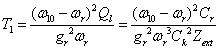

In [22]:
Ql_list = [0 for x in range(0,len(fq_list),1)]
Ck_list = [0 for x in range(0,len(fq_list),1)]

In [23]:
Ql_list

[0, 0, 0, 0]

In [24]:
Ck_list

[0, 0, 0, 0]

In [ ]:
## 外部品质因子的计算
def Ql(fr_list, Cr_list,Ck_list):
    i = 0
    for i in range(0,len(fr_list),1):
        Ql_list[i] = Cr_list[i]/(fr_list[i]*2*np.pi)/50/(Ck_list[i])**2
    return Ql_list
    
    
    
    
def T1(w10, wr, Ql, gr):
    

## ZZ耦合